</div> <div class="alert alert-block alert-danger">
 <p class ="lead"> 
 <h1>Examen 2 </h1>
 <h2>Física Computacional</h2>
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/1200px-Julia_Programming_Language_Logo.svg.png" style="height:42px;display:inline">


> Autor: Celeste Castro Granados $\mathbb C \hat{e}l \mathbb s$

In [19]:
using Plots
using PyPlot
using LaTeXStrings

# 1. Encuentra la solución numérica para la ecuación diferencial $\nabla^2 \phi = 0$ en dos dimensiones con condiciones a la frontera $\phi(0, y) = \phi(x, 0) = \phi(1, y) = \phi(x, 1) = 0$ y $\phi = 1$ para todos los puntos $x$, $y$ en dos círculos de radio $1/4$ con centros en $(0.4, 0.5)$ y $(0.6, 0.5)$. 
## Dibuje las líneas de campo vectorial que se generan de obtener $−\nabla \phi$.

### a) Solución numérica 

Para este problema, vamos a utilizar la discretización en 2D, por lo que, comenzaremos programando la función para construir la malla que necesitamos, en la cual $h_x=h_y=h$:

In [21]:
function Malla_cyr_2(x,y,r̃,V₀=1.0) #malla para dos circulos
    Mat = zeros(length(y),length(x)) # indices i,j
    for i in 2:length(y)-1 #el for va de 2:length(y)-1 porque no estamos tomando la frontera
        for j in 2:length(x)-1
            #fijamos los centros de ambos círculos
            if sqrt( (x[j]-0.4)^2 + (y[i]-0.5)^2 ) <= r̃ || sqrt( (x[j]-0.6)^2 + (y[i]-0.5)^2 ) <= r̃ 
                Mat[i,j] = V₀ #valor para los puntos interiores de ambos círculos
            else
                Mat[i,j] = rand() #valor para los puntos que no están dentro de los círculos
            end
        end
    end
    return Mat
end 

Malla_cyr_2 (generic function with 2 methods)

Y definimos nuestra malla (que va a tener los valores iniciales):

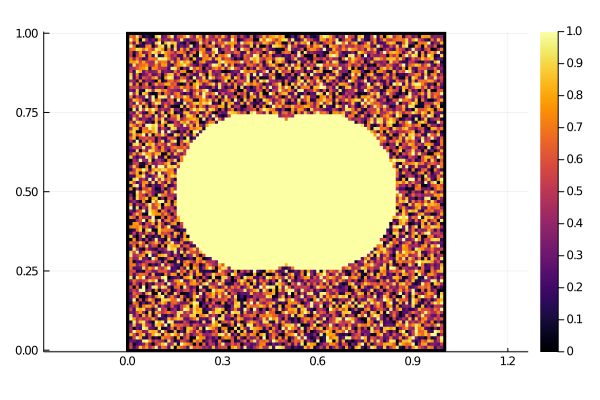

In [22]:
x = collect(0:0.01:1)
y = collect(0:0.01:1)
mi_malla = Malla_cyr_2(x,y,0.25)
heatmap(x,y,mi_malla,aspect_ratio=:equal)

Ahora, definimos la función que utilizaremos para relajar la malla, la cual utiliza el método de relajación: 

In [23]:
function relax!(Mat,V₀=1.0)
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            if Mat[i,j] ≠ V₀
                Mat[i,j] = 0.25*( Mat[i+1,j] + Mat[i-1,j] +
                    Mat[i,j+1] + Mat[i,j-1] )
            end
        end
    end
    return Mat
end

relax! (generic function with 2 methods)

Luego, probaremos la función con nuestra malla definida arriba: 

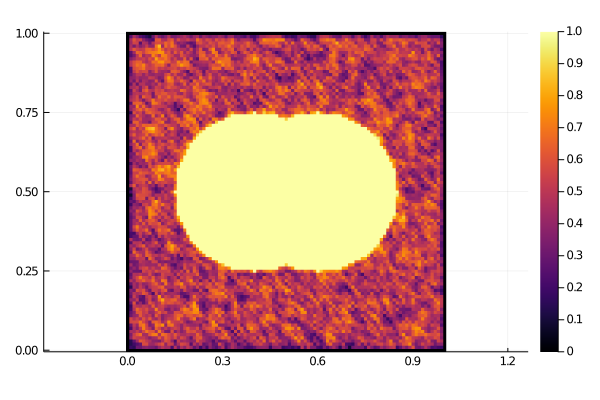

In [24]:
mi_malla = relax!(mi_malla)
heatmap(x,y,mi_malla,aspect_ratio=:equal)

Observamos que la función relax! relaja la malla una vez cada que se ejecuta, sin embargo, una vez no es suficiente para que la malla converja a la solución y tendríamos que estar ejecutando dicha función hasta que se alcance la convergencia, por lo tanto, necesitamos otra función que relaje la malla las veces necesarias, y nos entregue como resultado la malla una vez que ya haya convergido. Para esto, ocuparemos el método de Jacobi:

In [25]:
function met_jacobi_v1!(Mat,error=1e-5)
    testigo, cuenta = true,0
    while testigo == true
        Mat_old = copy(Mat)
        Mat = relax!(Mat) #va a ir relajando la malla en cada vuelta del while
        cuenta += 1
        if maximum( abs.( Mat .- Mat_old ) ) <= error #condición para que termine el proceso de relajación
            testigo = false
        end
    end
    return Mat, cuenta
end

met_jacobi_v1! (generic function with 2 methods)

Finalmente, obtenemos ahora sí la solución:

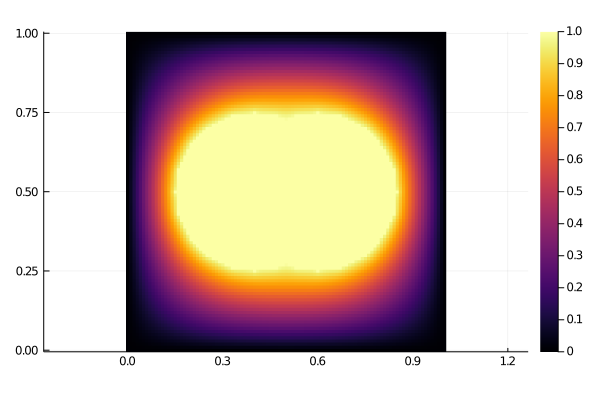

In [26]:
mi_malla = Malla_cyr_2(x,y,0.25)
mi_malla,cuenta = met_jacobi_v1!(mi_malla)
heatmap(x,y,mi_malla,aspect_ratio=:equal) #la malla ya convergió a la solución

Y para terminar, podemos graficar también las equipotenciales utilizando la función `contour`:

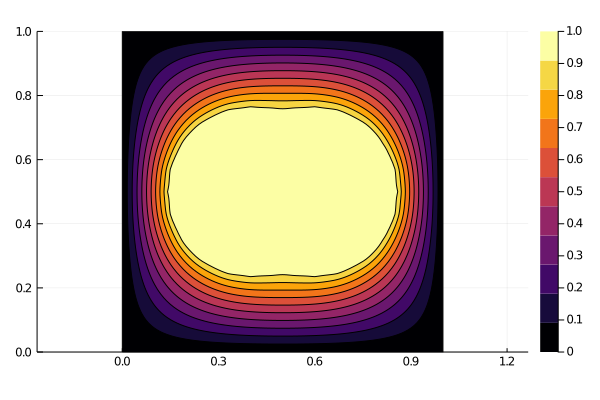

In [27]:
p1 = contour(x, y, mi_malla,nlevels=10,fill=true)
plot(p1,aspect_ratio=:equal)

### b) Líneas de campo vectorial que se generan de obtener $−\nabla \phi$.

Para este inciso, necesitamos obtener el campo eléctrico, i.e. el gradiente de la solución del inciso anterior. Por lo tanto, vamos a definir primero una función que calcule justamente el gradiente de una función:

In [28]:
#Definiremos dos funciones, una que regrese la parte x del gradiente y otra que regrese la parte y 

#Parte x
function gradiente_x(x,y,ϕ) #ϕ-función a la que se le va a calcular el gradiente
    h=x[2]-x[1]
    grad_x=zeros(length(x),length(y))
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            grad_x[i,j]=(ϕ[i,j+1]-ϕ[i,j-1])/h #calculo de la derivada
        end
    end
    return grad_x
end

#Parte y
function gradiente_y(x,y,ϕ)
    h=y[2]-y[1]
    grad_y=zeros(length(x),length(x))
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            grad_y[i,j]=(ϕ[i+1,j]-ϕ[i-1,j])/h #calculo de la derivada
        end
    end
    return grad_y
end

gradiente_y (generic function with 1 method)

Y con lo anterior, ya podemos graficar el campo eléctrico, para lo cual utilizaremos la función `streamplot`:

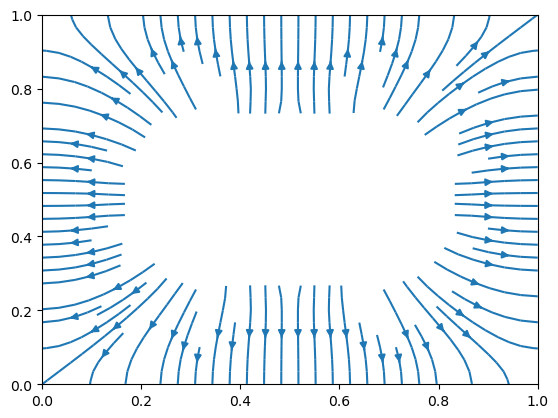

PyObject <matplotlib.streamplot.StreamplotSet object at 0x00000000512A6490>

In [29]:
E_x=-1 .*gradiente_x(x,y,mi_malla)
E_y=-1 .*gradiente_y(x,y,mi_malla)
streamplot(x,y,E_x,E_y)

# 2. Encuentre la solución a la ecuación de Fourier en 2D con condición a la frontera $\phi(0, y) = \phi(x, 0) = \phi(1, y) = \phi(x, 1) = 0$ y con condición inicial $\phi(x, y, 0) = 0$ para todos los puntos afuera de los dos círculos de radio $1/4$ con centros en $(0.4, 0.5)$ y $(0.6, 0.5)$, y $\phi = 1$ para todos los puntos dentro del los dos círculos anteriores.
## Puede suponer que el coeficiente de difusión es 1.

In [ ]:
#psi_ini_circ
#x,y,t,psi_mat=psi_ini_circ(x,y)
#heatmap
#Psi_Total
#crank_nicholson
#heatmap

# 3. Encuentre los estados estacionarios de la ecuación de onda en 2D para una membrana rectangular $L_x = \pi$, $L_y = 2\pi$. Compare la solución numérica de los eigenvalores con la solución analítica. 
## ¿Qué sucede con la solución si ahora $L_x = \pi$, $L_y =\sqrt{2\pi}$ ? 